<h2 style="text-align:center; color:green;">💰 Employee Salary Prediction 💰</h2>

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import numpy as np

##### Create Spark Session

In [2]:
spark = SparkSession.builder\
                    .master("local")\
                    .appName("appName")\
                    .config("Some.spark.option.config","somevalue")\
                    .getOrCreate()

##### Read the CSV File

In [3]:
df=spark.read.format("csv").option("header","true").load("C:\\Arunava Docs\\Pyspark Resourse\\ML\\Salary\\Salary Dataset.csv")

In [4]:
df.show(5)

+---+----------+-----------+-----------+------+---------+-------------+--------+------------+---------+
| ID|Experience|Job Profile|  Education|Salary|Got Bonus|Certification| College|      Skills|Job Level|
+---+----------+-----------+-----------+------+---------+-------------+--------+------------+---------+
|852|         0| Consultant|High School| 77376|       No|           No|Tier 2&3|Data Analyst|      Low|
|834|         0| Consultant|High School| 78706|       No|           No|Tier 2&3|Data Analyst|      Low|
|785|         3| Consultant|High School| 83554|       No|           No|Tier 2&3|Data Analyst|      Low|
|762|         6| Consultant| Bachelor's| 85241|       No|           No|Tier 2&3|Data Analyst|      Low|
|715|         2| Consultant|High School| 88756|       No|           No|Tier 2&3|Data Analyst|      Low|
+---+----------+-----------+-----------+------+---------+-------------+--------+------------+---------+
only showing top 5 rows


In [5]:
df.describe()

DataFrame[summary: string, ID: string, Experience: string, Job Profile: string, Education: string, Salary: string, Got Bonus: string, Certification: string, College: string, Skills: string, Job Level: string]

In [6]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Experience: string (nullable = true)
 |-- Job Profile: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Salary: string (nullable = true)
 |-- Got Bonus: string (nullable = true)
 |-- Certification: string (nullable = true)
 |-- College: string (nullable = true)
 |-- Skills: string (nullable = true)
 |-- Job Level: string (nullable = true)



In [7]:
rows = df.count()
cols = len(df.columns)
print("Total Rows are: ",rows)
print("Total Columns are: ",cols)

Total Rows are:  1000
Total Columns are:  10


In [8]:
#Duplicates Drop
df = df.dropDuplicates()

In [9]:
rows = df.count()
cols = len(df.columns)
print("Total Rows are: ",rows)
print("Total Columns are: ",cols)

Total Rows are:  1000
Total Columns are:  10


##### Casting

In [10]:
from pyspark.sql.functions import col

df = df.withColumn("ID", col("ID").cast("int"))
df = df.withColumn("Experience", col("Experience").cast("int"))
df = df.withColumn("Salary", col("Salary").cast("float"))

In [11]:
from pyspark.sql.functions import year, current_date, col

df = df.withColumn("YOJ", year(current_date()) - col("Experience"))

In [12]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Job Profile: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Salary: float (nullable = true)
 |-- Got Bonus: string (nullable = true)
 |-- Certification: string (nullable = true)
 |-- College: string (nullable = true)
 |-- Skills: string (nullable = true)
 |-- Job Level: string (nullable = true)
 |-- YOJ: integer (nullable = true)



# Group By & Ploting

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Job Profile

In [14]:
df.groupBy("Job Profile").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False).show()
df.groupBy("Job Profile").agg(round(avg("Salary"),2).alias("Avg Salary")).orderBy("Avg Salary", ascending = False).show()

+--------------+---------+
|   Job Profile|Headcount|
+--------------+---------+
|    Consultant|      241|
|       Analyst|      211|
|Senior Analyst|      204|
|       Manager|      189|
|      Director|      142|
|   Global Head|       13|
+--------------+---------+

+--------------+----------+
|   Job Profile|Avg Salary|
+--------------+----------+
|   Global Head| 156924.92|
|      Director| 127351.89|
|       Manager|  111121.9|
|    Consultant|  103881.1|
|Senior Analyst|   93805.3|
|       Analyst|  83657.68|
+--------------+----------+



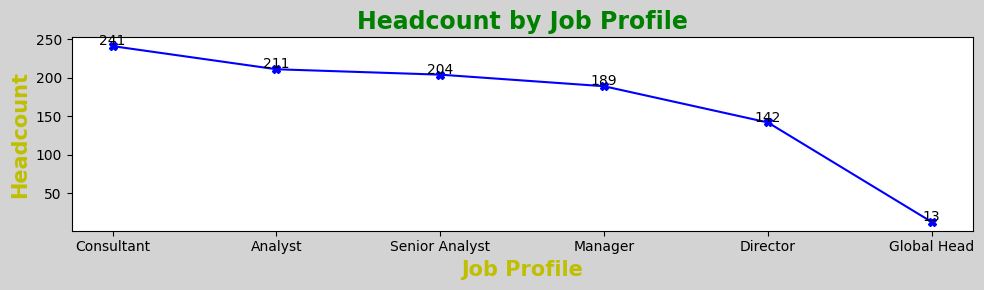

In [15]:
Job_Profile = df.groupBy("Job Profile").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False)
# Convert to Pandas DataFrame for plotting
Job_Profile = Job_Profile.toPandas()

fig=plt.figure(figsize=(10,3), facecolor='#D3D3D3')
plt.title('Headcount by Job Profile', color='g', fontsize=17, fontweight='bold')
plt.xlabel('Job Profile', color='y', fontsize=15, fontweight='bold')
plt.ylabel('Headcount', color='y', fontsize=15, fontweight='bold')
plt.plot(Job_Profile['Job Profile'], Job_Profile['Headcount'], marker='X',color='b')
# Show exact numbers on the graph
for i in range(len(Job_Profile)):
    plt.text(Job_Profile["Job Profile"][i], Job_Profile["Headcount"][i] + 1, str(Job_Profile["Headcount"][i]), ha='center', color='black')

plt.tight_layout()
plt.show()

## Education

In [16]:
df.groupBy("Education").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False).show()
df.groupBy("Education").agg(round(avg("Salary"),2).alias("Avg Salary")).orderBy("Avg Salary", ascending = False).show()

+-----------+---------+
|  Education|Headcount|
+-----------+---------+
|High School|      263|
|        PhD|      256|
| Bachelor's|      254|
|   Master's|      227|
+-----------+---------+

+-----------+----------+
|  Education|Avg Salary|
+-----------+----------+
|        PhD| 110968.03|
|   Master's| 106512.72|
| Bachelor's|  99408.18|
|High School|  95488.78|
+-----------+----------+



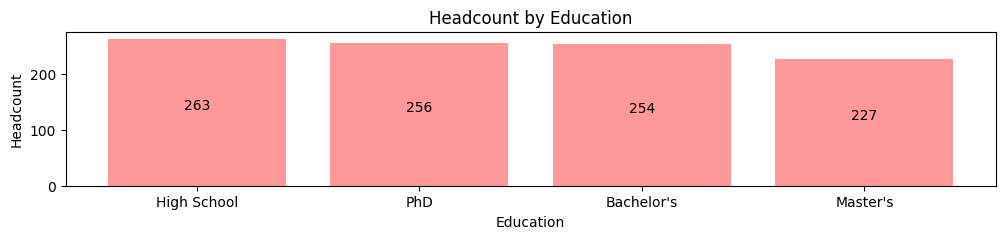

In [17]:
Education = df.groupBy("Education").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False)
Education = Education.toPandas()
fig=plt.figure(figsize=(12,2))
plt.title("Headcount by Education")
plt.xlabel("Education")
plt.ylabel("Headcount")
bars=plt.bar(Education['Education'], Education['Headcount'], color='r', alpha=0.4)
# Display value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height/2, f'{height}', ha='center', va='bottom')

plt.show()

## Got Bonus

In [18]:
df.groupBy("Got Bonus").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False).show()
df.groupBy("Got Bonus").agg(round(avg("Salary"),2).alias("Avg Salary")).orderBy("Avg Salary", ascending = False).show()

+---------+---------+
|Got Bonus|Headcount|
+---------+---------+
|      Yes|      549|
|       No|      451|
+---------+---------+

+---------+----------+
|Got Bonus|Avg Salary|
+---------+----------+
|      Yes| 120725.11|
|       No|  81311.18|
+---------+----------+



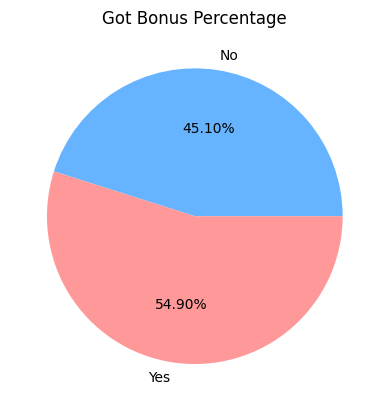

In [19]:
Got_Bonus = df.groupBy("Got Bonus").agg(count("ID").alias("Headcount"))
Got_Bonus = Got_Bonus.toPandas()

# Define custom colors for the pie chart
col = ['#66b3ff', '#ff9999']
plt.title("Got Bonus Percentage")
plt.pie(Got_Bonus['Headcount'] , labels = Got_Bonus['Got Bonus'], autopct = '%1.2F%%', colors=col)
plt.show()

## Cerification

In [20]:
df.groupBy("Certification").agg(count("ID").alias("Headcount")).show()
df.groupBy("Certification").agg(round(avg("Salary"),2).alias("Avg Salary")).show()

+-------------+---------+
|Certification|Headcount|
+-------------+---------+
|           No|      451|
|          Yes|      549|
+-------------+---------+

+-------------+----------+
|Certification|Avg Salary|
+-------------+----------+
|           No|  81311.18|
|          Yes| 120725.11|
+-------------+----------+



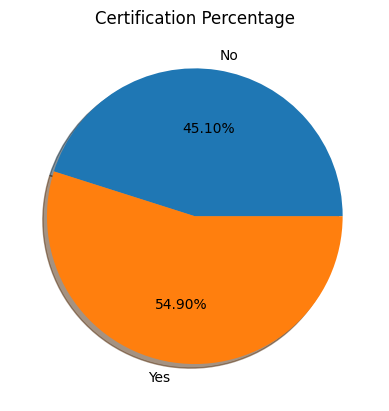

In [21]:
Certification = df.groupBy("Certification").agg(count("ID").alias("Headcount"))
Certification = Certification.toPandas()

plt.title("Certification Percentage")
exp = [0.0,0.0]
plt.pie(Certification['Headcount'], labels = Certification['Certification'], explode=exp, shadow = True, autopct = '%1.2F%%')
plt.show()

## College

In [22]:
df.groupBy("College").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False).show()
df.groupBy("College").agg(round(avg("Salary"),2).alias("Avg Salary")).orderBy("Avg Salary", ascending = False).show()

+--------+---------+
| College|Headcount|
+--------+---------+
|Tier 2&3|      451|
|     IIT|      421|
|     NIT|      128|
+--------+---------+

+--------+----------+
| College|Avg Salary|
+--------+----------+
|     IIT| 125633.79|
|     NIT| 104580.18|
|Tier 2&3|  81311.18|
+--------+----------+



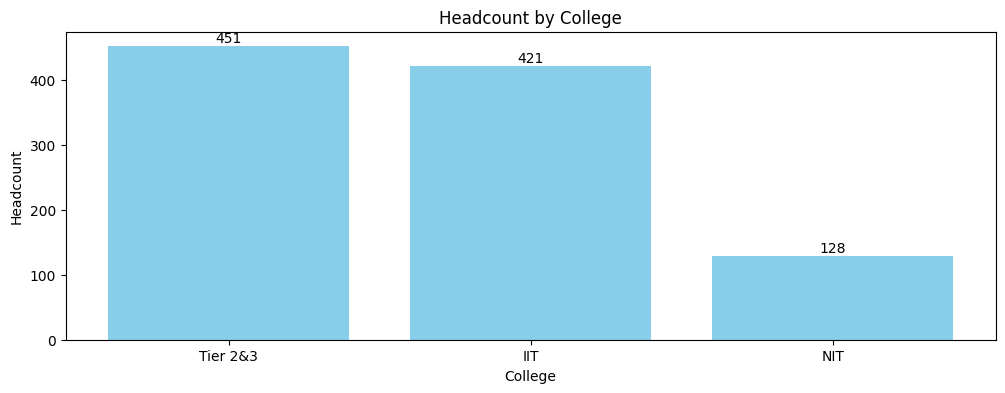

In [23]:
College = df.groupBy("College").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False)
College = College.toPandas()
fig=plt.figure(figsize=(12,4))
plt.title("Headcount by College")
plt.xlabel("College")
plt.ylabel("Headcount")
bars=plt.bar(College['College'], College['Headcount'], color='skyblue')
# Display value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')

plt.show()

## Skills

In [24]:
df.groupBy("Skills").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False).show()
df.groupBy("Skills").agg(round(avg("Salary"),2).alias("Avg Salary")).orderBy("Avg Salary", ascending = False).show()

+----------------+---------+
|          Skills|Headcount|
+----------------+---------+
|Data Engineering|      480|
|    Data Analyst|      327|
|              HR|      124|
|              AI|       41|
|    Data Science|       28|
+----------------+---------+

+----------------+----------+
|          Skills|Avg Salary|
+----------------+----------+
|              AI| 150094.59|
|    Data Science| 141606.11|
|Data Engineering| 116998.41|
|    Data Analyst|  88651.96|
|              HR|  61952.81|
+----------------+----------+



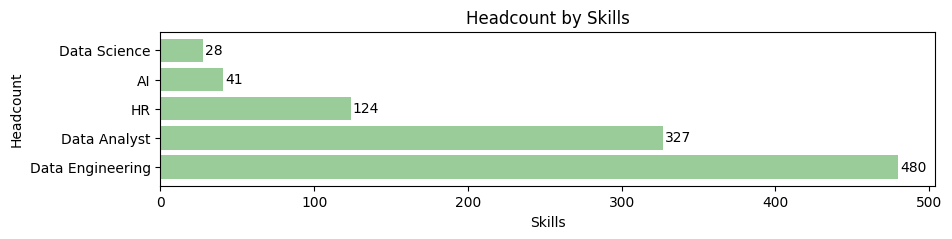

In [25]:
Skills = df.groupBy("Skills").agg(count("ID").alias("Headcount")).orderBy("Headcount", ascending = False)
Skills = Skills.toPandas()

fig=plt.figure(figsize=(10,2))
plt.title("Headcount by Skills")
plt.xlabel("Skills")
plt.ylabel("Headcount")
bars=plt.barh(Skills['Skills'], Skills['Headcount'], color='g', alpha=0.4)

# Display value on top of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2.0, f'{width}', va='center')
plt.show()

## Job Level

In [26]:
df.groupBy("Job Profile" , "Job Level").agg(count("ID").alias("Headcount")).orderBy("Job Profile", ascending = False).show()
df.groupBy("Job Level").agg(round(avg("Salary"),2).alias("Avg Salary")).orderBy("Avg Salary", ascending = False).show()

+--------------+---------+---------+
|   Job Profile|Job Level|Headcount|
+--------------+---------+---------+
|Senior Analyst|      Low|      118|
|Senior Analyst|      Mid|       86|
|       Manager|      Low|       56|
|       Manager|      Mid|      114|
|       Manager|     High|       19|
|   Global Head|     High|       13|
|      Director|      Mid|      109|
|      Director|     High|       33|
|    Consultant|      Low|      109|
|    Consultant|     High|        4|
|    Consultant|      Mid|      128|
|       Analyst|      Mid|       58|
|       Analyst|      Low|      153|
+--------------+---------+---------+

+---------+----------+
|Job Level|Avg Salary|
+---------+----------+
|     High| 146649.99|
|      Mid| 116471.82|
|      Low|  80681.25|
+---------+----------+



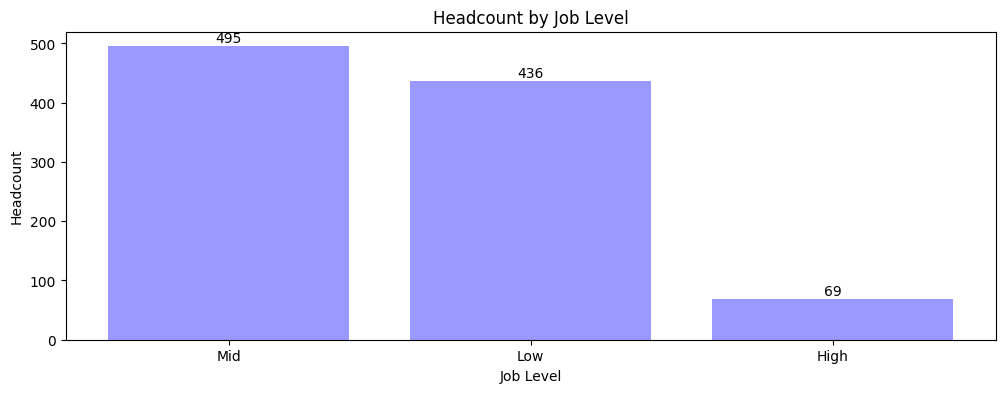

In [27]:
Job_Level = df.groupBy("Job Level").agg(count("ID").alias("Headcount")).orderBy("Job Level", ascending = False)
Job_Level = Job_Level.toPandas()
fig=plt.figure(figsize=(12,4))
plt.title("Headcount by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Headcount")
bars=plt.bar(Job_Level['Job Level'], Job_Level['Headcount'], color='b', alpha=0.4)
# Display value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height}', ha='center', va='bottom')

plt.show()

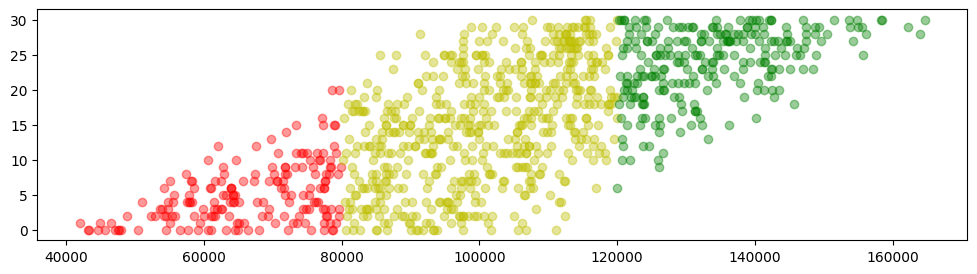

In [28]:
df_high = df.filter(df["Salary"] >= 120000).toPandas()
df_mid = df.filter((df["Salary"] >= 80000) & (df["Salary"] < 120000)).toPandas()
df_low = df.filter(df["Salary"] < 80000).toPandas()

fig=plt.figure(figsize=(12,3))
plt.scatter(df_low['Salary'], df_low['Experience'], color='r', alpha=0.4)
plt.scatter(df_mid['Salary'], df_mid['Experience'], color='y', alpha=0.4)
plt.scatter(df_high['Salary'], df_high['Experience'], color='g', alpha=0.4)

plt.show()

## Price

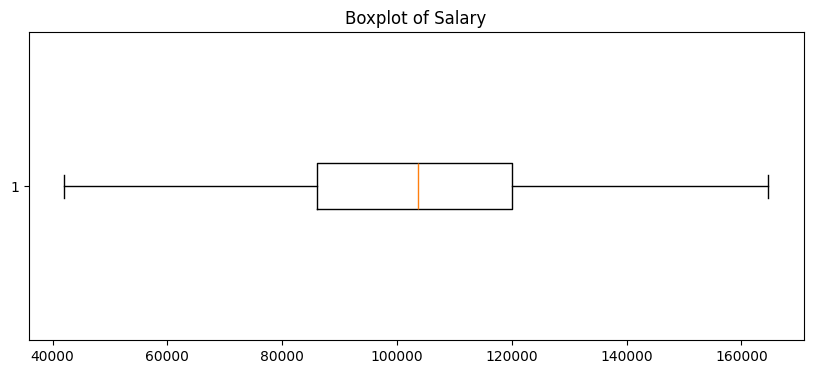

In [29]:
df_pd=df.toPandas()
fig=plt.figure(figsize=(10,4))
plt.boxplot(df_pd['Salary'], vert=False)
plt.title('Boxplot of Salary')
# Step 4: Display the plot
plt.show()

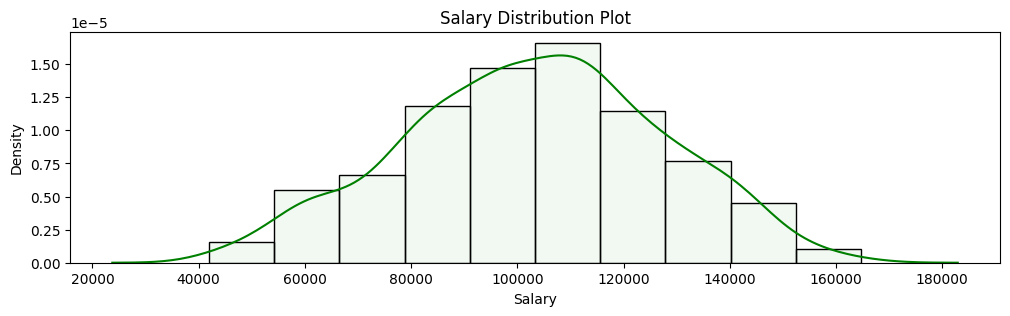

In [30]:
import seaborn as sns
df_pd=df.toPandas()
fig=plt.figure(figsize=(12,3))

# Plot histogram
sns.histplot(df_pd['Salary'], bins=10, color='green', alpha=0.05, stat='density')

# Plot KDE separately
sns.kdeplot(df_pd['Salary'], color='g')

plt.title('Salary Distribution Plot')
plt.show()

## Correlation Matrix

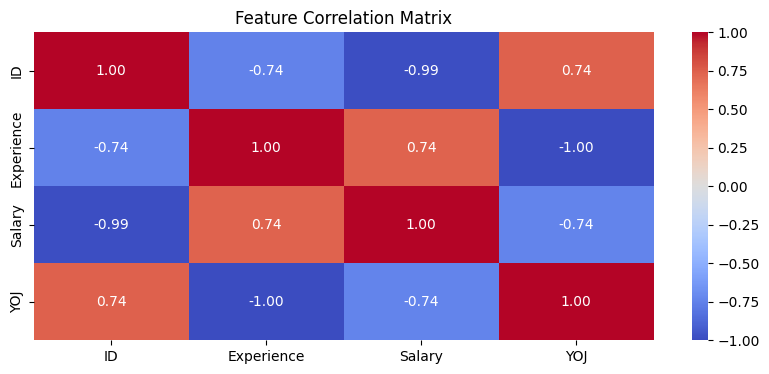

In [31]:
Cor = df_pd.select_dtypes(include='number').corr()
plt.figure(figsize=(10,4))
sns.heatmap(Cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Encoding

In [32]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [33]:
X = df_pd.drop(["ID", "Salary", "YOJ"], axis=1)
Y = df_pd["Salary"]

In [34]:
X.head(3)

,Experience,Job Profile,Education,Got Bonus,Certification,College,Skills,Job Level
0,8,Director,Bachelor's,Yes,Yes,IIT,Data Engineering,Mid
1,29,Senior Analyst,Master's,Yes,Yes,IIT,Data Engineering,Mid
2,28,Analyst,Bachelor's,Yes,Yes,NIT,Data Engineering,Mid


In [35]:
t = ColumnTransformer(transformers=[
    ('t1', OneHotEncoder(sparse_output=False, drop='first'),
    ['Job Profile', 'Education', 'College', 'Skills']),
    ('t2', MinMaxScaler(),
    ['Experience']),
    ('t3', OrdinalEncoder(categories=[['No', 'Yes'], ['No', 'Yes'], ['Low' ,'Mid', 'High']]),
    ['Got Bonus' , 'Certification', 'Job Level'])
], remainder = 'passthrough')

In [36]:
# Convert target variable to NumPy array
y = np.array(Y)
# Apply the transformation
x = t.fit_transform(X)

# Model Tranning

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1000, 18)
(1000,)
(800, 18)
(800,)
(200, 18)
(200,)


# <span style="color:#90ee90">Linear Regression</span>
<span style="color:blue">Best model trainning</span>

In [38]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
y_test[1]

np.float32(111376.0)

In [40]:
y_pred1 = model1.predict(x_test)
y_pred1[1]

np.float64(115672.36628074874)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("MAE: ", mae)
print("R2: ",r2)

MAE:  3434.889225420399
R2:  0.9691230148850238


# <span style="color:red">RandomForestRegressor</span>

In [42]:
from sklearn.ensemble  import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_test[1]

np.float32(111376.0)

In [44]:
y_pred2 = model2.predict(x_test)
y_pred2[1]

np.float64(115017.1738333333)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("MAE: ", mae)
print("R2: ",r2)

MAE:  3754.619357528859
R2:  0.9572303344149429


# <span style="color:yellow">XGBRegressor</span>

In [46]:
from xgboost import XGBRegressor

model3 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model3.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [47]:
y_test[1]

np.float32(111376.0)

In [48]:
y_pred3 = model3.predict(x_test)
y_pred3[1]

np.float32(115156.5)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("MAE: ", mae)
print("R2: ",r2)

MAE:  3841.36572265625
R2:  0.9584183096885681


In [50]:
#################################################################### THE END #######################################################################